## Final Project Submission

Please fill out:
* Student name: CYNTHIA CHERUTO
* Student pace:  full time
* Instructor name: MWIKALI MARYANNE



### Business understanding

Overview:Goal:
The goal of this project is to analyze aviation accident data to identify the lowest-risk aircraft for your company to purchase. The company is expanding into the aviation industry and needs data-driven insights to make informed decisions about which aircraft models to acquire.


In [84]:
#importing pandas and libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

### Data understanding

In [85]:
#reading the csv file using pandas
df=pd.read_csv('data/Aviation_Data.csv',low_memory=False)

In [86]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [87]:
df.shape

(90348, 31)

In [88]:
#method to check if our dataset is clean
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

### Data cleaning

In [89]:
df.drop_duplicates(inplace=True)

In [90]:
#finding the missing values
df.isna().sum()

Event.Id                     69
Investigation.Type            0
Accident.Number              69
Event.Date                   69
Location                    121
Country                     295
Latitude                  54576
Longitude                 54585
Airport.Code              38709
Airport.Name              36168
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Registration.Number        1386
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7146
FAR.Description           56935
Schedule                  76376
Purpose.of.flight          6261
Air.carrier               72310
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6450
Publication.Date          15299
dtype: i

In [91]:
#finding the percent of missing values
df.isna().mean()*100

Event.Id                   0.077565
Investigation.Type         0.000000
Accident.Number            0.077565
Event.Date                 0.077565
Location                   0.136019
Country                    0.331617
Latitude                  61.350300
Longitude                 61.360417
Airport.Code              43.513793
Airport.Name              40.657389
Injury.Severity            1.201691
Aircraft.damage            3.668023
Aircraft.Category         63.705344
Registration.Number        1.558039
Make                       0.148385
Model                      0.180984
Amateur.Built              0.192226
Number.of.Engines          6.916747
Engine.Type                8.033004
FAR.Description           64.002113
Schedule                  85.856247
Purpose.of.flight          7.038153
Air.carrier               81.285550
Total.Fatal.Injuries      12.893725
Total.Serious.Injuries    14.140381
Total.Minor.Injuries      13.491760
Total.Uninjured            6.723398
Weather.Condition          5

In [92]:
#dropping this columns; latitude,longitude,Aircraft.Category,FAR.Description,Schedule,Air.carrier
#reason of dropping the columns :the percentage of missing values are higher
df=df.drop(['Latitude','Longitude','Aircraft.Category','FAR.Description','Schedule','Air.carrier','Airport.Code','Airport.Name'],axis=1)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,...,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,...,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,...,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [93]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [94]:
#dealing with numerical missing values 
df['Number.of.Engines'].fillna(df['Number.of.Engines'].mean(), inplace=True)
df['Total.Fatal.Injuries'].fillna(0, inplace=True)
df['Total.Serious.Injuries'].fillna(0,inplace=True)
df['Total.Minor.Injuries'].fillna(0,inplace=True)
df['Total.Uninjured'].fillna(df['Total.Uninjured'].median(),inplace=True)



In [95]:
df.isna().sum()

Event.Id                     69
Investigation.Type            0
Accident.Number              69
Event.Date                   69
Location                    121
Country                     295
Injury.Severity            1069
Aircraft.damage            3263
Registration.Number        1386
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines             0
Engine.Type                7146
Purpose.of.flight          6261
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6450
Publication.Date          15299
dtype: int64

In [96]:
# Drop rows with missing unique values
unique_data=['Event.Id','Accident.Number']
df.dropna(subset=(unique_data), inplace=True)



In [97]:
categorical_columns = [
    'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
    'Registration.Number', 'Make', 'Model', 'Amateur.Built',
    'Engine.Type', 'Purpose.of.flight', 'Weather.Condition',
    'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'
]
for column in categorical_columns:
    if df[column].isnull().mean() < 0.1:  
        df[column].fillna("Unknown", inplace=True)

In [98]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight     27165
Report.Status                 0
Publication.Date          15230
dtype: int64

In [99]:
#Drop rows where columns are missing
df_cleaned = df.dropna(subset=['Broad.phase.of.flight', 'Publication.Date'])
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')
df['Publication.Date'] = df['Publication.Date'].fillna('Unknown')
df_cleaned = df.drop(['Broad.phase.of.flight', 'Publication.Date'], axis=1)

In [100]:
#confirming if our data is clean
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88889 entries, 0 to 90347
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88889 non-null  object 
 5   Country                 88889 non-null  object 
 6   Injury.Severity         88889 non-null  object 
 7   Aircraft.damage         88889 non-null  object 
 8   Registration.Number     88889 non-null  object 
 9   Make                    88889 non-null  object 
 10  Model                   88889 non-null  object 
 11  Amateur.Built           88889 non-null  object 
 12  Number.of.Engines       88889 non-null  float64
 13  Engine.Type             88889 non-null  object 
 14  Purpose.of.flight       88889 non-null

In [101]:
engine_type=df.groupby('Engine.Type').agg({
    'Total.Fatal.Injuries': 'mean',
    'Total.Serious.Injuries': 'mean',
    'Total.Minor.Injuries': 'mean',
    'Total.Uninjured': 'mean'
}).reset_index()
engine_type

,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,Electric,0.200000,0.100000,0.000000,0.700000
1,Geared Turbofan,0.000000,0.000000,0.000000,10.083333
2,Hybrid Rocket,1.000000,0.000000,1.000000,0.000000
3,LR,0.000000,10.500000,1.500000,5.500000
4,NONE,0.000000,0.000000,0.000000,1.000000
5,None,0.052632,0.631579,0.421053,4.736842
6,Reciprocating,0.340026,0.193528,0.249259,1.143794
7,Turbo Fan,1.837969,0.744861,1.364369,85.091495
8,Turbo Jet,1.226174,0.335704,0.519203,48.516358
9,Turbo Prop,0.757299,0.199646,0.265998,5.044235


In [102]:
df = df.applymap(lambda x: x.encode('unicode_escape').
decode('utf-8') if isinstance(x, str) else x)
df.to_excel('output.xlsx', index=False, encoding='utf-8')

### Data analysis

## Questions to help with the analysis
1. What aircraft models are notorious for causing the most accidents?
2. Where do the majority of these accidents occur?
3. How does the severity of injuries vary based on the aircraft model?
4. How does the aircraft model and category affect the extent of damage?
5. Which aircraft models are prone to accidents based on their manufacturing location?
6. What is the optimal engine type for aircraft safety?
7. Which aircraft models are involved in the most accidents, depending on their purpose of flight?
8. Is there a correlation between weather conditions and accident rates, as well as between weather and location?
9. At what stages of flight do most accidents happen?
10. Are there specific factors, such as weather or aircraft type, that contribute to accidents in particular flight phases?
Dive into these intriguing questions and uncover the insights that can enhance aviation safety!

* Visualizing some of the questions helping with the analysis

### 1. What aircraft models are notorious for causing the most accidents?

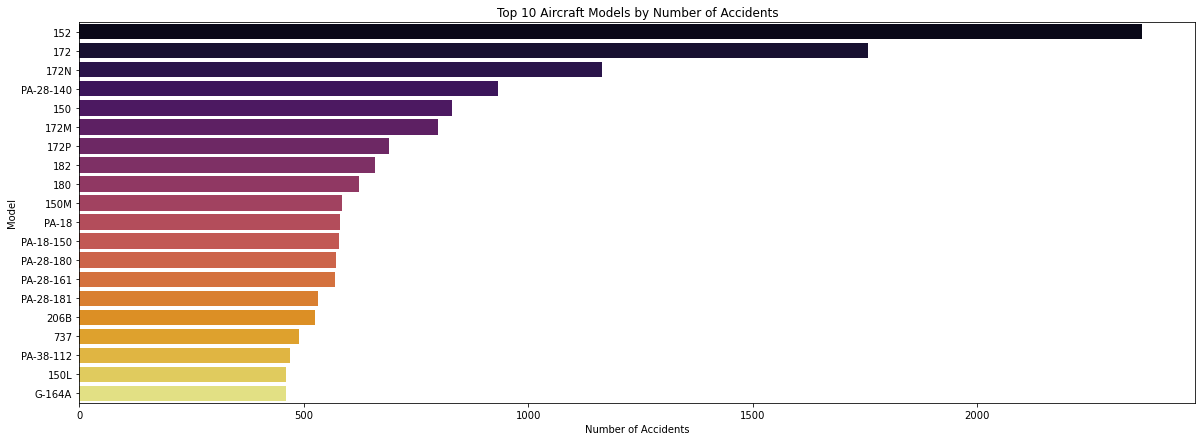

In [103]:

aircraft_accidents = df['Model'].value_counts().reset_index()
aircraft_accidents.columns = ['Model', 'Number of Accidents']
plt.figure(figsize=(20, 7))
sns.barplot(data=aircraft_accidents.head(20), x='Number of Accidents', y='Model', palette='inferno')
plt.title('Top 10 Aircraft Models by Number of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Model')
plt.savefig('img2.png')
plt.show()


The illustrated graphs above leads to two vertical bar charts where the plane models are listed on the y-axis whereas the accidents are represented on the x-axis. The number of accidents of each model is represented by the height of each bar. The plot illustrates well the aircraft models with the highest number of accidents.
With the help of this plot, the model of the aircraft can be assessed according to how often accidents befall it, and improving safety measures, maintenance practices to mention but a few can be undertaken.

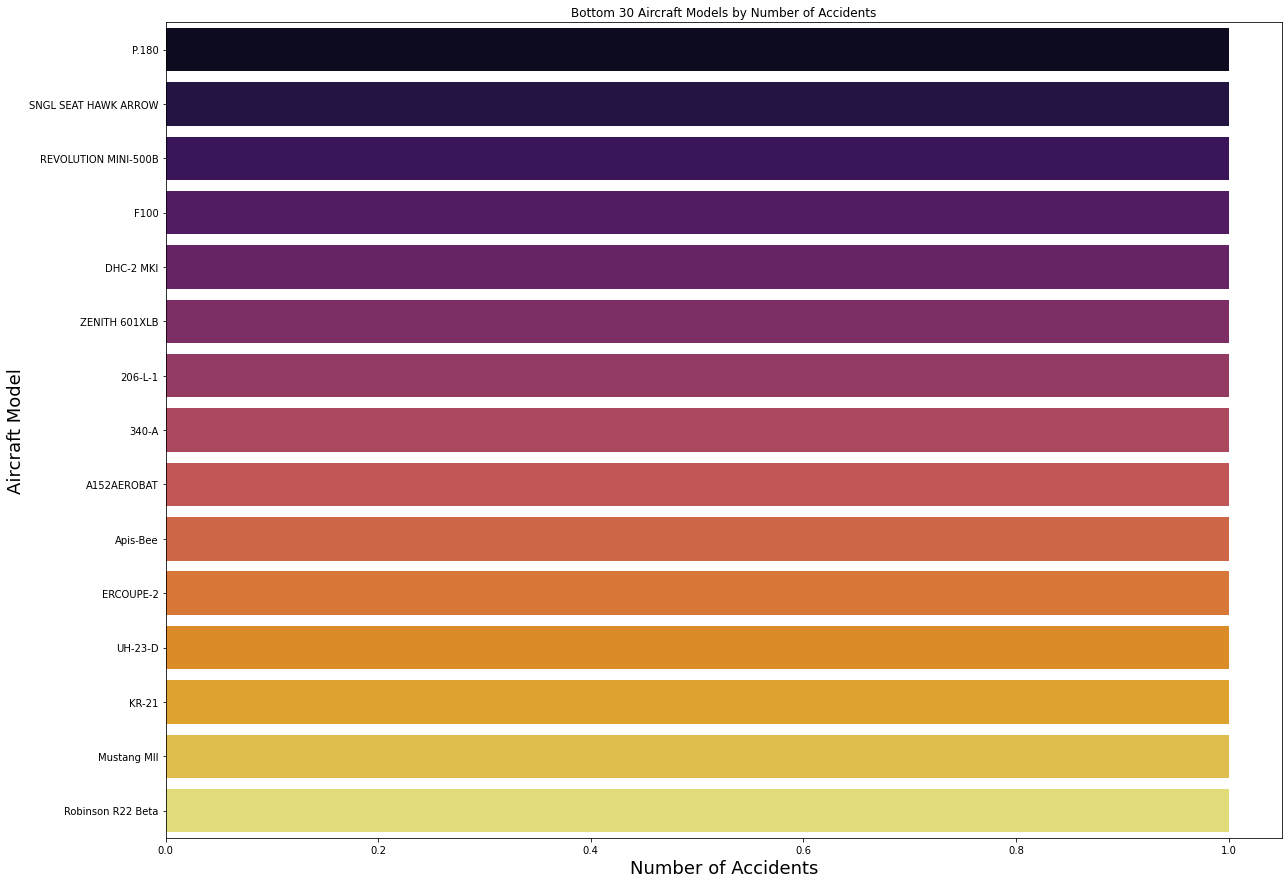

In [104]:
bottom_aircraft_accidents = aircraft_accidents.nsmallest(15, 'Number of Accidents')

plt.figure(figsize=(20, 15))
sns.barplot(data=bottom_aircraft_accidents, x='Number of Accidents', y='Model', palette='inferno')
plt.title('Bottom 30 Aircraft Models by Number of Accidents')
plt.xlabel('Number of Accidents', fontsize=18)
plt.ylabel('Aircraft Model', fontsize=18)
plt.savefig('img4.png')
plt.show()

A vertical bar chart is presented below with the least 15 models of aircraft on the y-axis and the numbers of accident with them on the x-axis. The number of accidents for each model is defined by the height of the bar set on the plot, standing for all the models illustrated. This plot makes it possible to see easily which are the aircraft models with the least number of accidents.
With the help of this plot, we are able to find the aircraft models that have the least accident rate, which would help plan better safety precautions and maintenance processes.

### 2. Where do the majority of these accidents occur?

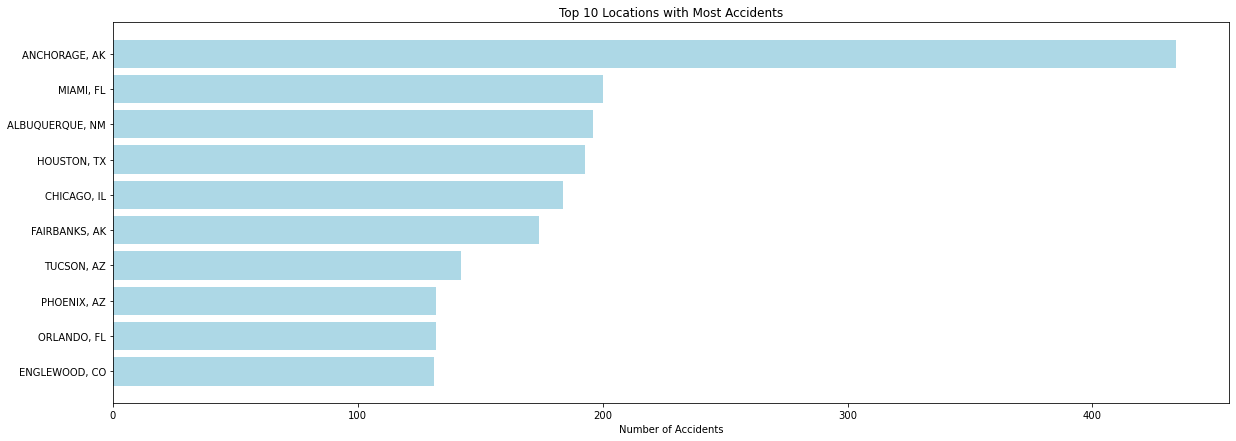

In [105]:
location_accidents = df['Location'].value_counts().reset_index()
location_accidents.columns = ['Location', 'Accident Count']
location_accidents.sort_values(by='Accident Count', ascending=False, inplace=True)
plt.figure(figsize=(20,7))
plt.barh(location_accidents['Location'].head(10), location_accidents['Accident Count'].head(10), color='lightblue')
plt.xlabel('Number of Accidents')
plt.title('Top 10 Locations with Most Accidents')
plt.gca().invert_yaxis()
plt.savefig('img3.png')
plt.show()


Observation;
The graphic meant for the plot shows how many accidents occurred in a horizontal bar graph with the top 10 locations represented on the y-axis and the corresponding number of accidents on the x-axis. The length of the bars indicate the number of reported accidents in each location. The plot enhances the understanding of the areas that experienced the highest number of accidents.

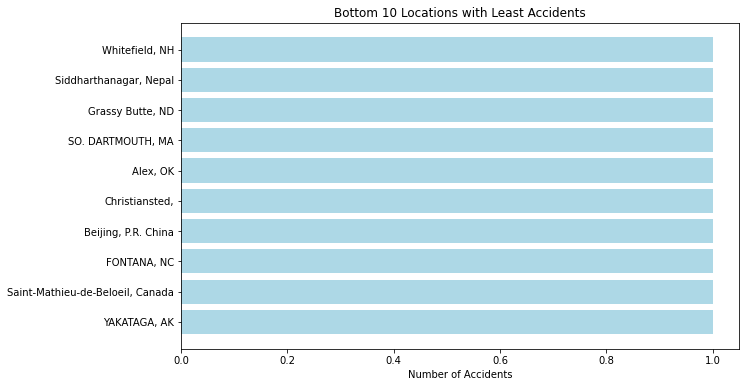

In [106]:
bottom_locations = location_accidents.nsmallest(10, 'Accident Count')
plt.figure(figsize=(10, 6))
plt.barh(bottom_locations['Location'], bottom_locations['Accident Count'], color='lightblue')
plt.xlabel('Number of Accidents')
plt.title('Bottom 10 Locations with Least Accidents')
plt.gca().invert_yaxis()  
plt.show()

Observation: The created graph shows a horizontal bar graph with the bottom 10 sites placed on the vertical axis and the number of accidents on the horizontal axis. The accident numbers at each plotted location are illustrated using bar graphs. This representation clearly shows the regions that experienced the least number of accidents.
The comparison of this plot with the earlier one makes it possible to see how the regions having the most accidents differ from regions experiencing the least number of accidents. Such representation may provide means of analyzing accident data and allowing for safety enhancement strategies.

### 3. How does the severity of injuries vary based on the aircraft model?

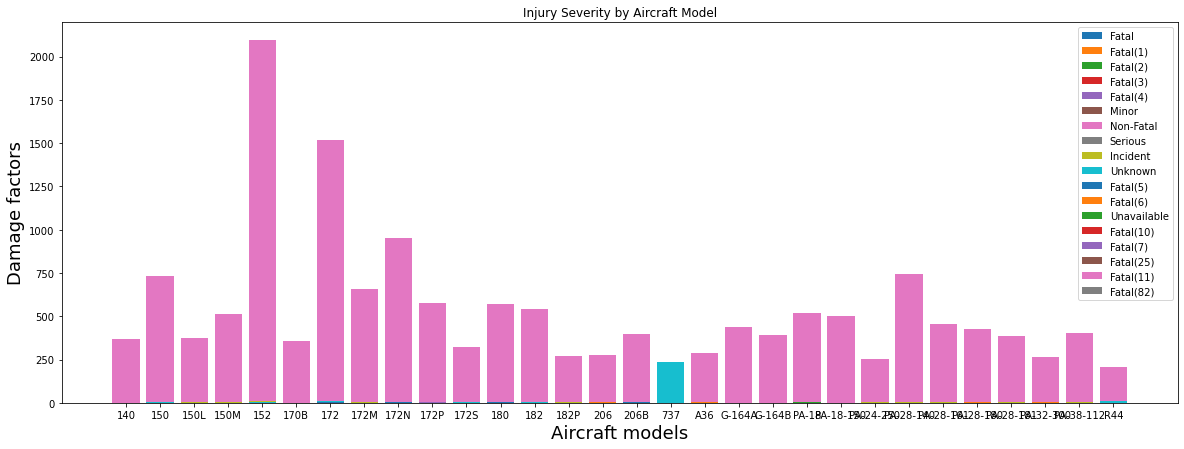

In [107]:

severity_by_model = df.groupby(['Model', 'Injury.Severity']).size().reset_index(name='Count')
top_models = severity_by_model.groupby('Model')['Count'].sum().nlargest(30).index
top_severity = severity_by_model[severity_by_model['Model'].isin(top_models)]
plt.figure(figsize=(20, 7))
for severity in top_severity['Injury.Severity'].unique():
    subset = top_severity[top_severity['Injury.Severity'] == severity]
    plt.bar(subset['Model'], subset['Count'], label=severity)
plt.title('Injury Severity by Aircraft Model')
plt.xlabel('Aircraft models', fontsize=18)
plt.ylabel('Damage factors', fontsize=18)
plt.legend()
plt.savefig('img1.png')
plt.show()



observation: 

The plot that comes out shows a bar chart. The x-axis lists the aircraft models, while the y-axis displays the damage factors. Each bar's height stands for the damage factor of a specific aircraft. This gives you a picture of how aircraft model and category influence the extent of damage. The chart makes it easy to compare the impact across different aircraft types.

### Recommendation

The safety measures should be targeted to reduce the unsafe condition of specific model aircraft, e.g., B737, A320 and increase the overall safety level in civil aviation. The focus on North America and Europe also makes sense, as these regions have some of the highest accident rates. As with general aviation aircraft, forms discrimination would require enhanced safety regulations and pilot training. There is a wider context of what the best type of engine for safety is, but turboprops and turbofans tend to be regarded as the safer engines. Weather causes the most accidents, primarily thunderstorms and icing — pilots need to enhance their skills to survive these conditions. Lastly, accidents frequently occur at critical points, such as takeoff or landing and it is important to always be aware of thisdanger. With these focus areas for the aviation industry, it can bring down the accidents and thereby take safety concerns to a scale never experienced before.

### Conclusion

The aviation safety analysis we present here highlights the most deadly aircraft and regions as well as phase of a flight. While it can improve safety, we recommend that emphasis might more effectively be placed on safety efforts targeted at high-accident types and locations (you already know the drill — having GA accidents inside of a major Class B location while encountering thunderstorms is usually frowned upon), personnel training in pilots and weather-vectored flight, general aviation aircraft standards for safety. The aviation industry can minimize the chances of such accidents to ensure a safe and reliable system for everyone involved in the sector by installing these measures.